In [1]:
import pandas as pd
df= pd.read_excel(r"C:\Users\polpi\Desktop\data science\assignments\Decision Tree\heart_disease.xlsx")
df

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [2]:
df = pd.read_excel(r"C:\Users\polpi\Desktop\data science\assignments\Decision Tree\heart_disease.xlsx", sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [3]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [4]:
df=df.dropna()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [6]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,53.425532,132.449173,202.652482,137.167849,0.891253,0.979905
std,9.099243,19.243667,111.654072,25.608434,1.093875,1.128783
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,177.250000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,225.000000,140.000000,0.500000,1.000000
75%,60.000000,140.000000,269.750000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [7]:
categorical_columns = ['sex', 'cp', 'restecg', 'slope', 'thal']
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in sex:
['Male' 'Female']

Unique values in cp:
['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']

Unique values in restecg:
['lv hypertrophy' 'normal' 'st-t abnormality']

Unique values in slope:
['downsloping' 'flat' 'upsloping']

Unique values in thal:
['fixed defect' 'normal' 'reversable defect']


In [8]:
numerical_df=df.select_dtypes(include=['float64', 'int64'])
numerical_df

,age,trestbps,chol,thalch,oldpeak,num
0,63,145,233,150,2.3,0
1,41,135,203,132,0.0,0
2,57,140,192,148,0.4,0
3,52,118,186,190,0.0,0
4,57,110,201,126,1.5,0
...,...,...,...,...,...,...
901,51,110,0,92,0.0,4
902,62,160,254,108,3.0,4
903,53,125,0,120,1.5,4
904,62,166,170,120,3.0,4


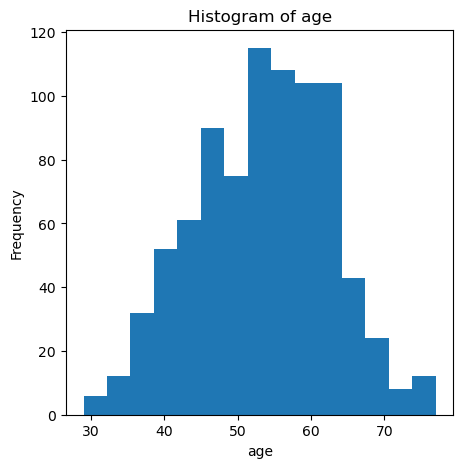

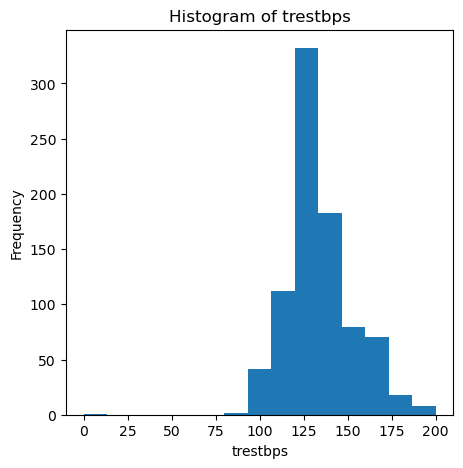

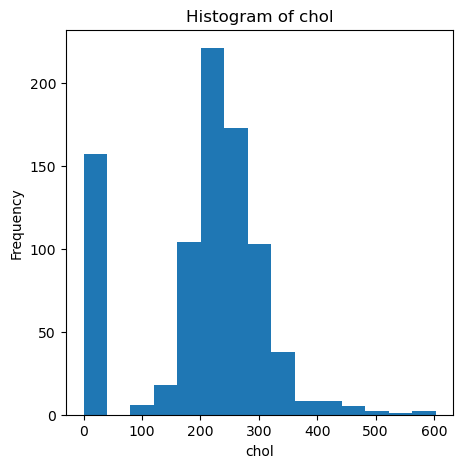

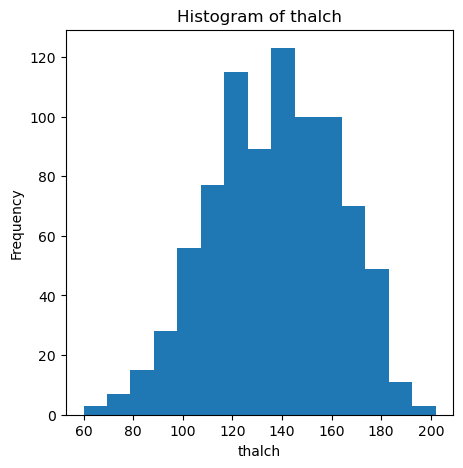

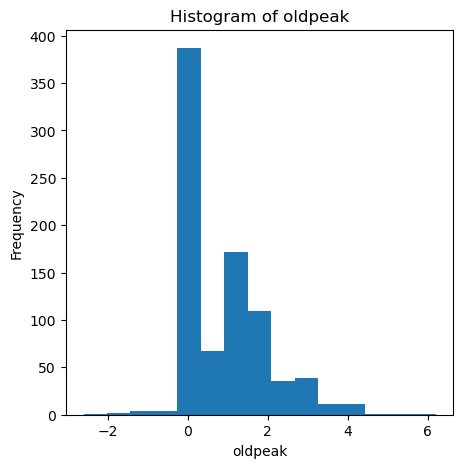

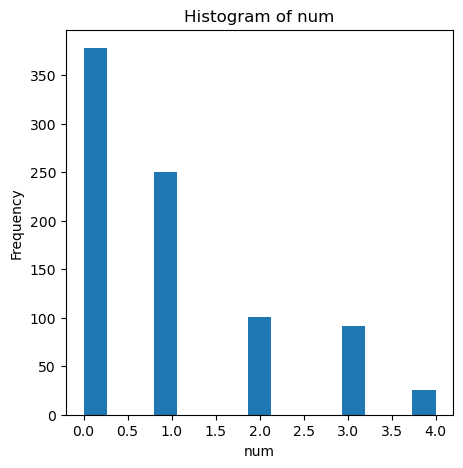

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in numerical_df.columns:
    data=numerical_df[column]
    plt.figure(figsize=(5,5))
    plt.hist(data,bins=15)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

C:\Users\polpi\AppData\Local\Temp\ipykernel_34784\2819393476.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)


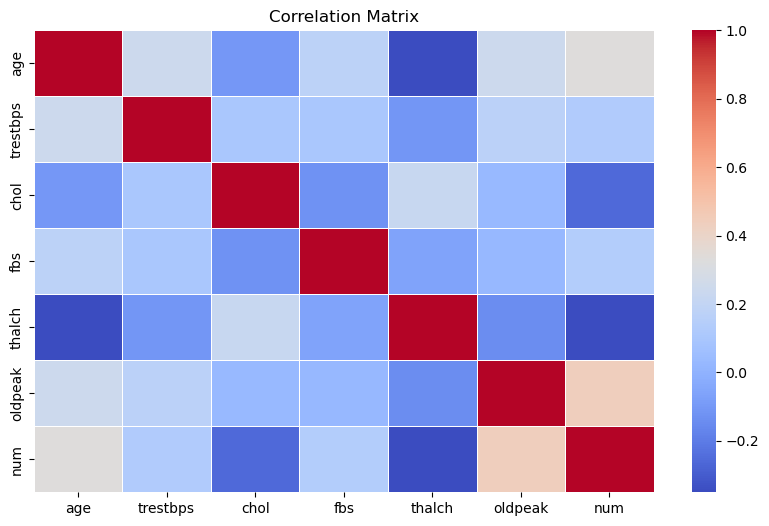

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

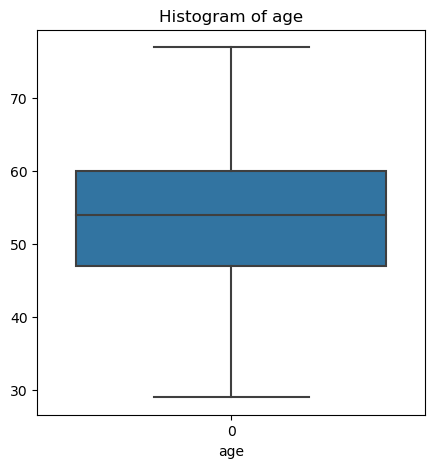

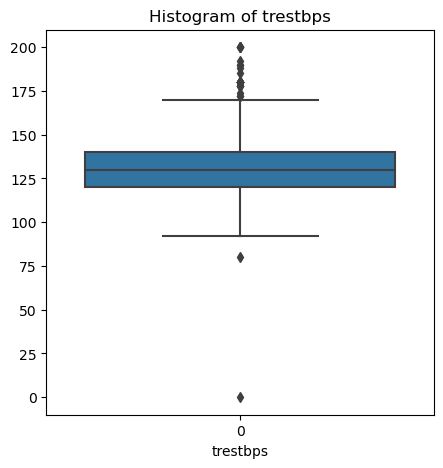

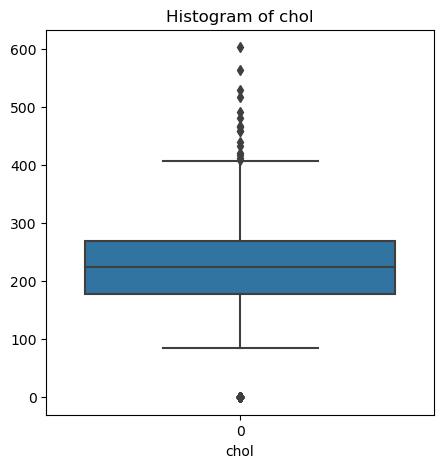

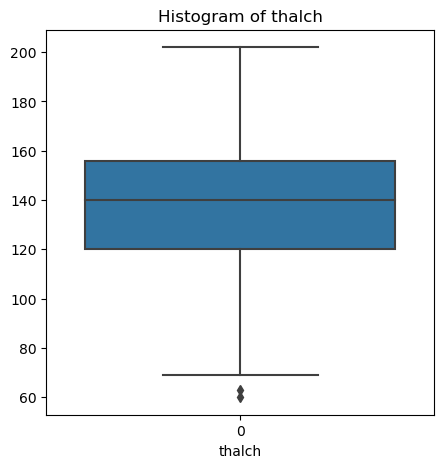

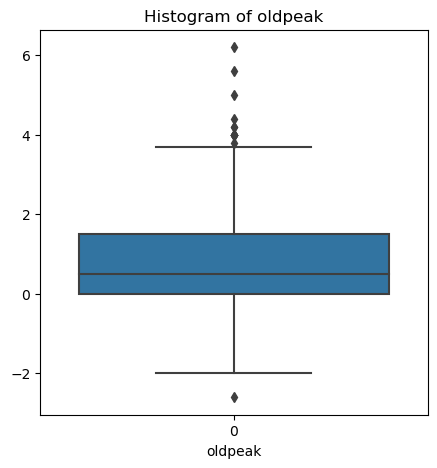

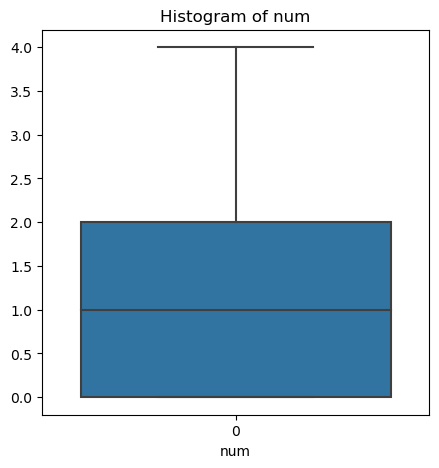

In [11]:
for column in numerical_df.columns:
    data=numerical_df[column]
    plt.figure(figsize=(5,5))
    sns.boxplot(data)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.show()

In [12]:
# To remove outliers one more for loop
for column in numerical_df.columns:
    Q1 = numerical_df[column].quantile(0.25)
    Q3 = numerical_df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    numerical_df = numerical_df[(numerical_df[column] >= lower_bound) & (numerical_df[column] <= upper_bound)]

numerical_df


,age,trestbps,chol,thalch,oldpeak,num
0,63,145,233,150,2.3,0
1,41,135,203,132,0.0,0
2,57,140,192,148,0.4,0
3,52,118,186,190,0.0,0
4,57,110,201,126,1.5,0
...,...,...,...,...,...,...
751,52,128,204,156,1.0,2
761,55,116,186,102,0.0,2
762,72,160,213,130,1.5,2
764,58,150,219,118,0.0,2


In [27]:
categorical_df = df.select_dtypes(include=['object', 'bool'])
encoded_df = pd.get_dummies(categorical_df, drop_first=True)
encoded_df_cleaned = encoded_df.loc[numerical_df.index] #To clean the rows that are cleaned in numerical_df
final_df = pd.concat([numerical_df, encoded_df_cleaned], axis=1)
final_df

,age,trestbps,chol,thalch,oldpeak,num,fbs,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,True,1,0,0,1,0,0,0,0,0,0,0,0
1,41,135,203,132,0.0,0,False,1,1,0,0,1,0,0,0,1,0,0,0
2,57,140,192,148,0.4,0,False,1,0,0,0,1,0,0,0,1,0,0,0
3,52,118,186,190,0.0,0,False,1,0,0,1,0,0,0,0,1,0,0,0
4,57,110,201,126,1.5,0,False,1,0,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,52,128,204,156,1.0,2,True,1,0,0,0,1,0,1,0,1,0,1,0
761,55,116,186,102,0.0,2,True,1,0,0,0,0,1,0,0,1,0,0,0
762,72,160,213,130,1.5,2,True,1,0,0,0,0,0,0,0,0,1,1,0
764,58,150,219,118,0.0,2,False,1,0,1,0,0,1,1,0,0,0,1,0


In [50]:
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import numpy as np
x = final_df.drop('num', axis=1)
y = final_df['num']
x_train,x_test,y_train,y_test= tts(x,y,train_size=0.8,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((460, 18), (116, 18), (460,), (116,))

In [51]:
dtc = DecisionTreeClassifier()
dtc_fit=dtc.fit(x_train, y_train)
y_pred=dtc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Accuracy (63%): Model 63% accurate.\nPrecision (66.3%): When the model predicts something as positive, it is correct about 66% of the time.\nRecall (63%): The model catches 63% of the actual positive instances.\nF1 Score (64%): Model strikes a reasonable balance between precision and recall.\nThe model is moderately effective but might benefit from further tuning or adjustments to improve performance.")

Accuracy: 0.6293103448275862
Precision: 0.6362689445853745
Recall: 0.6293103448275862
F1 Score: 0.6298898185526813
Accuracy (63%): Model 63% accurate.
Precision (66.3%): When the model predicts something as positive, it is correct about 66% of the time.
Recall (63%): The model catches 63% of the actual positive instances.
F1 Score (64%): Model strikes a reasonable balance between precision and recall.
The model is moderately effective but might benefit from further tuning or adjustments to improve performance.


[Text(0.6109873112416108, 0.9642857142857143, 'exang_True <= 0.5\ngini = 0.541\nsamples = 576\nvalue = [343, 178, 55]'),
 Text(0.3497011325503356, 0.8928571428571429, 'cp_atypical angina <= 0.5\ngini = 0.379\nsamples = 386\nvalue = [295, 72, 19]'),
 Text(0.1490666946308725, 0.8214285714285714, 'sex_Male <= 0.5\ngini = 0.471\nsamples = 257\nvalue = [175, 63, 19]'),
 Text(0.06208053691275168, 0.75, 'chol <= 324.0\ngini = 0.188\nsamples = 78\nvalue = [70, 6, 2]'),
 Text(0.0436241610738255, 0.6785714285714286, 'trestbps <= 156.5\ngini = 0.132\nsamples = 72\nvalue = [67, 3, 2]'),
 Text(0.026845637583892617, 0.6071428571428571, 'thalch <= 108.0\ngini = 0.086\nsamples = 67\nvalue = [64, 1, 2]'),
 Text(0.013422818791946308, 0.5357142857142857, 'oldpeak <= 1.1\ngini = 0.444\nsamples = 6\nvalue = [4, 0, 2]'),
 Text(0.006711409395973154, 0.4642857142857143, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(0.020134228187919462, 0.4642857142857143, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),

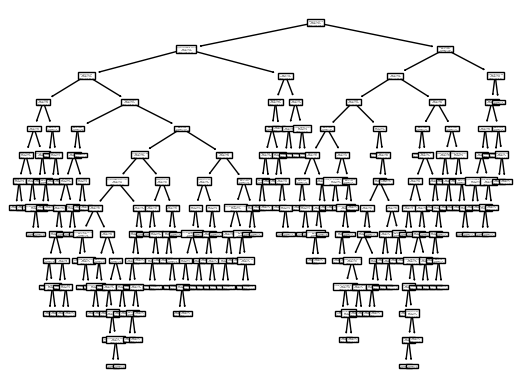

In [37]:
from sklearn import tree
features=x.columns.tolist()
dtree=dtc.fit(x,y)
tree.plot_tree(dtree, feature_names=features)

In [43]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_scaled=mms.fit_transform(x)

In [48]:
x_train2,x_test2,y_train2,y_test2= tts(x_scaled,y,train_size=0.8,random_state=42)
x_train2.shape,x_test2.shape,y_train2.shape,y_test2.shape

((460, 18), (116, 18), (460,), (116,))

In [49]:
dtc_fit=dtc.fit(x_train2, y_train2)
y_pred2=dtc.predict(x_test2)
accuracy = accuracy_score(y_test2, y_pred2)
precision = precision_score(y_test2, y_pred2, average='weighted')
recall = recall_score(y_test2, y_pred2, average='weighted')
f1 = f1_score(y_test2, y_pred2, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Scaling improves every factor- making it a comparatively better model")

Accuracy: 0.603448275862069
Precision: 0.6264115195149679
Recall: 0.603448275862069
F1 Score: 0.6130990111561867
Scaling improves every factor- making it a comparatively better model


In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1)

grid_search.fit(x_train2, y_train2)

print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [64]:
best_dtree = grid_search.best_estimator_

y_pred3 = best_dtree.predict(x_test2)

accuracy = accuracy_score(y_test2, y_pred3)
precision = precision_score(y_test2, y_pred3, average='weighted')
recall = recall_score(y_test2, y_pred3, average='weighted') 
f1 = f1_score(y_test2, y_pred3, average='weighted')

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("All parameters similar to scaled model, suggesting, hypertuning failed to prepare a better model")

Accuracy: 0.6724137931034483
Precision: 0.6558614454074952
Recall: 0.6724137931034483
F1 Score: 0.6381417624521073
All parameters similar to scaled model, suggesting, hypertuning failed to prepare a better model


[Text(0.6133961397058824, 0.9642857142857143, 'exang_True <= 0.5\ngini = 0.541\nsamples = 576\nvalue = [343, 178, 55]'),
 Text(0.3528135212418301, 0.8928571428571429, 'cp_atypical angina <= 0.5\ngini = 0.379\nsamples = 386\nvalue = [295, 72, 19]'),
 Text(0.15660743464052287, 0.8214285714285714, 'sex_Male <= 0.5\ngini = 0.471\nsamples = 257\nvalue = [175, 63, 19]'),
 Text(0.07026143790849673, 0.75, 'chol <= 0.773\ngini = 0.188\nsamples = 78\nvalue = [70, 6, 2]'),
 Text(0.049019607843137254, 0.6785714285714286, 'trestbps <= 0.827\ngini = 0.132\nsamples = 72\nvalue = [67, 3, 2]'),
 Text(0.026143790849673203, 0.6071428571428571, 'thalch <= 0.282\ngini = 0.086\nsamples = 67\nvalue = [64, 1, 2]'),
 Text(0.013071895424836602, 0.5357142857142857, 'oldpeak <= 0.306\ngini = 0.444\nsamples = 6\nvalue = [4, 0, 2]'),
 Text(0.006535947712418301, 0.4642857142857143, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(0.0196078431372549, 0.4642857142857143, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]

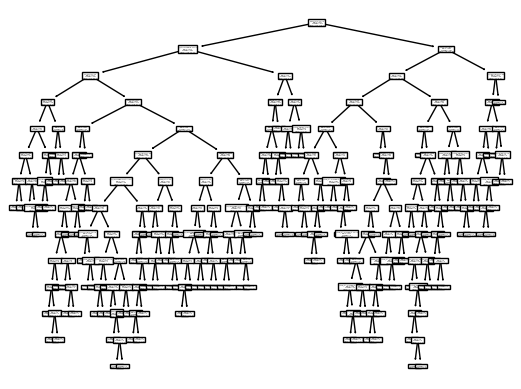

In [65]:
dtree=dtc.fit(x_scaled,y)
tree.plot_tree(dtree, feature_names=features)

In [3]:
print("Some hyperparameters used in decision tree are:\n1. max_depth-controls over or under-fitting.")
print("2. min_samples_split- higher values reduces splitting reducing overfitting, while smaller values increase tree size \nbut increases risk of overfitting.")
print("3. min_sample_leaf- It is a threshold for new leaf nodes- larger values prevent splits while smaller values would lead \nto over splitting and therefore overfitting.")
print("4. class_weight- weights are associated with classes to balace the dataset")
print("5. max_features- the maximum number of features required for the best data split. Higher features increases accuracy but \nalso the risk of overfitting")

Some hyperparameters used in decision tree are:
1. max_depth-controls over or under-fitting.
2. min_samples_split- higher values reduces splitting reducing overfitting, while smaller values increase tree size 
but increases risk of overfitting.
3. min_sample_leaf- It is a threshold for new leaf nodes- larger values prevent splits while smaller values would lead 
to over splitting and therefore overfitting.
4. class_weight- weights are associated with classes to balace the dataset
5. max_features- the maximum number of features required for the best data split. Higher features increases accuracy but 
also the risk of overfitting


In [5]:
print("Here are few differences between Label encoding and one hot encoding:")
print("1. Label encoding gives integers to each unique component of the each column, where as one-hot encoding produces columns with \nbinary data")
print("2. The number of columns remain intact in the case of Label encoding while it increases for one-hot encoding")
print("3. Label encoding is more suitable if there are a lot of unique components in a column. One-hot encoding is great when the \nnumber of components are few like 2 to 3 in a column")

Here are few differences between Label encoding and one hot encoding:
1. Label encoding gives integers to each unique component of the each column, where as one-hot encoding produces columns with 
binary data
2. The number of columns remain intact in the case of Label encoding while it increases for one-hot encoding
3. Label encoding is more suitable if there are a lot of unique components in a column. One-hot encoding is great when the 
number of components are few like 2 to 3 in a column
